In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from enum import Enum

In [2]:
assert sys.version != "3.13.2" , "wrong python version"

In [ ]:
dataset = pd.read_csv("student_habits_performance.csv",index_col="student_id")
dataset

<Axes: xlabel='age'>

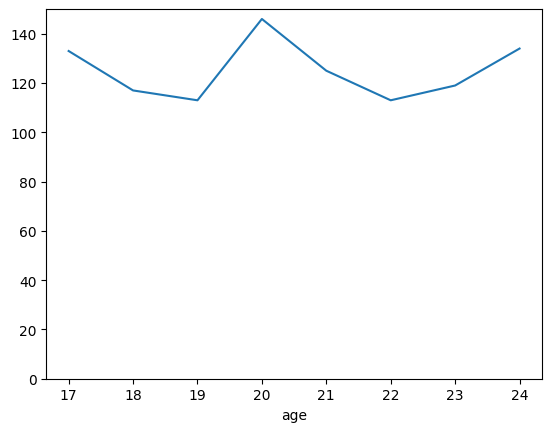

In [11]:
# pour l'age on aimerais avoir le nombre de personne de chaque age
dataset.groupby("age").size().plot(ylim=(0,150))

In [12]:
# repartition par genre
dataset.groupby("gender").size().to_frame('Number')

,Number
gender,
Female,481
Male,477
Other,42


<Axes: xlabel='exam_score'>

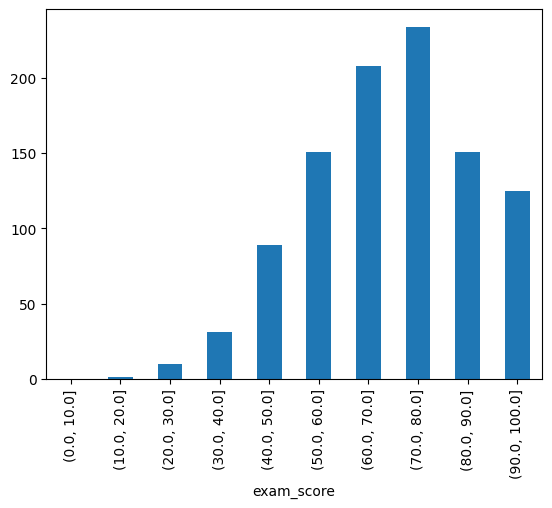

In [14]:
# on veut avoir la répartition des résultats par tranches de 10 de score
pd.cut(dataset["exam_score"],[0,10,20,30,40,50,60,70,80,90,100.0]).value_counts().sort_index().plot(kind="bar")

In [20]:
# On peut ainsi déterminer la moyenne, la médiane et l'écart-type des résultats
moyenne = dataset["exam_score"].mean()
mediane = dataset["exam_score"].median()
ecart_type = dataset["exam_score"].std()
print("moyenne : ",moyenne, ", médiane : ",mediane, " écart-type : ",ecart_type)

moyenne :  69.6015 , médiane :  70.5  écart-type :  16.88856392181825


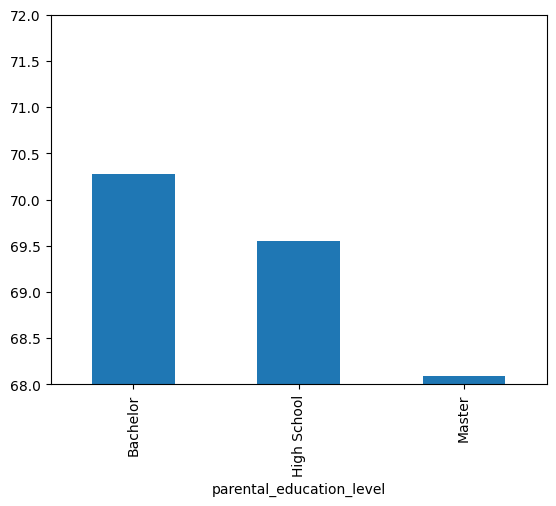

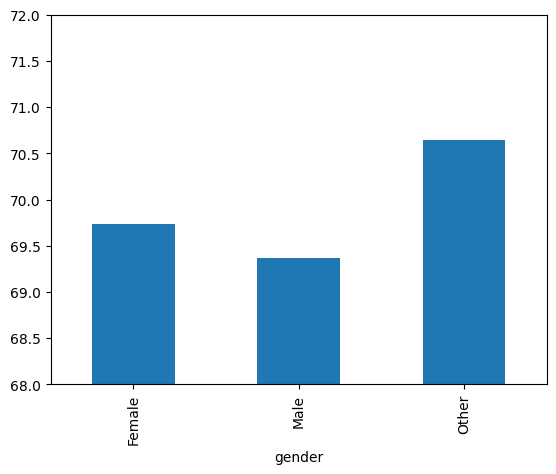

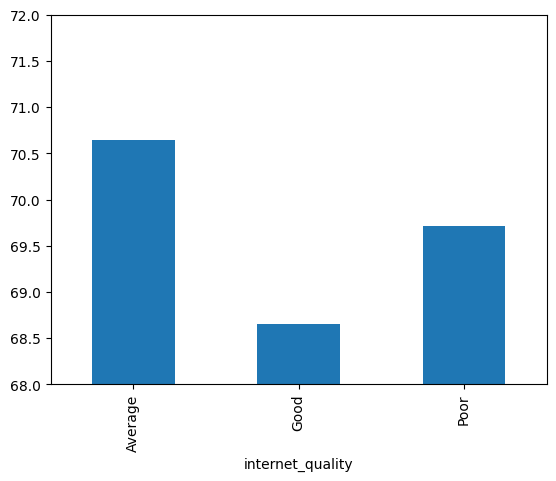

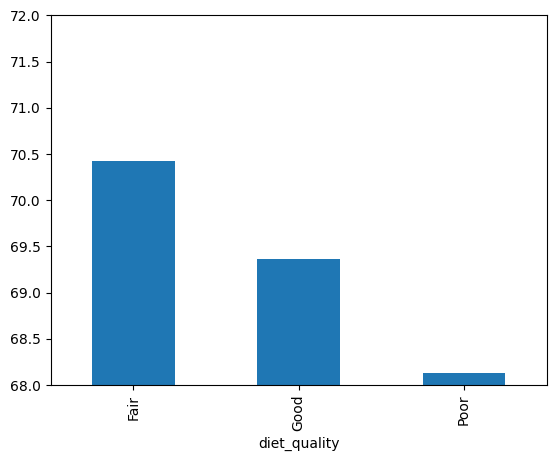

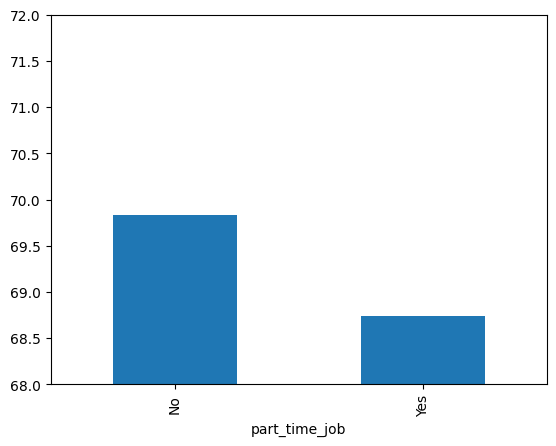

In [19]:
dataset.groupby("parental_education_level")["exam_score"].mean().plot(kind="bar",ylim=(68,72))
plt.show()
dataset.groupby("gender")["exam_score"].mean().plot(kind="bar",ylim=(68,72))
plt.show()
dataset.groupby("internet_quality")["exam_score"].mean().plot(kind="bar",ylim=(68,72))
plt.show()
dataset.groupby("diet_quality")["exam_score"].mean().plot(kind="bar",ylim=(68,72))
plt.show()
dataset.groupby("part_time_job")["exam_score"].mean().plot(kind="bar",ylim=(68,72))
plt.show()

On arrange maintenant le dataset pour remplacer les string par des int

In [ ]:
gender_map = {"Female":0,"Male":1,"Other":2}
job_map = {"No":0,"Yes":1}
diet_map  ={"Poor":0,"Fair":1,"Good":2}
parentlevel_map = {"Bachelor":0,"High School":1,"Master":2}
extraactivity_map = {"No":0,"Yes":1}
internet_map = {"Poor":0,"Average":1,"Good":2}

In [ ]:
dataset["gender"] = dataset["gender"].map(gender_map)
dataset["part_time_job"] = dataset["part_time_job"].map(job_map)
dataset["diet_quality"] = dataset["diet_quality"].map(diet_map)
dataset["parental_education_level"] = dataset["parental_education_level"].map(parentlevel_map)
dataset["extracurricular_participation"] = dataset["extracurricular_participation"].map(extraactivity_map)
dataset["internet_quality"] = dataset["internet_quality"].map(internet_map)

dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2
S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2,6,1.0,1,8,0,100.0
S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0,1,1.0,0,1,0,34.3
S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8
S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,1,2,1.0,2,6,1,76.1
S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,0,1,1.0,1,6,1,65.9
S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,2,5,0.0,2,9,1,64.4


<Axes: >

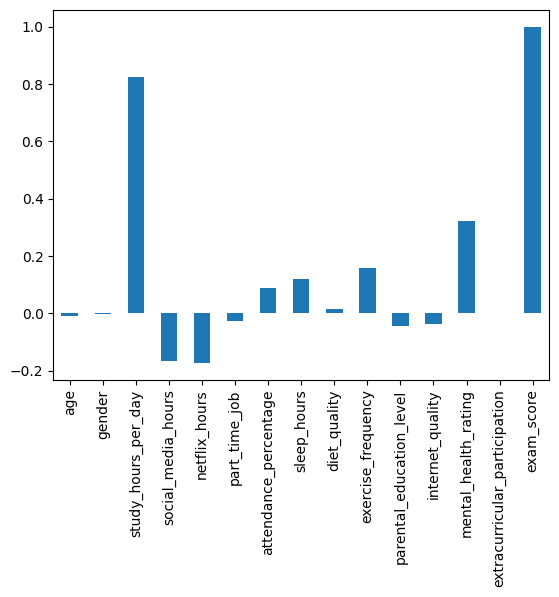

In [ ]:
# correlation matrix
dataset.corr()["exam_score"].plot(kind="bar")

<Axes: xlabel='parental_education_level'>

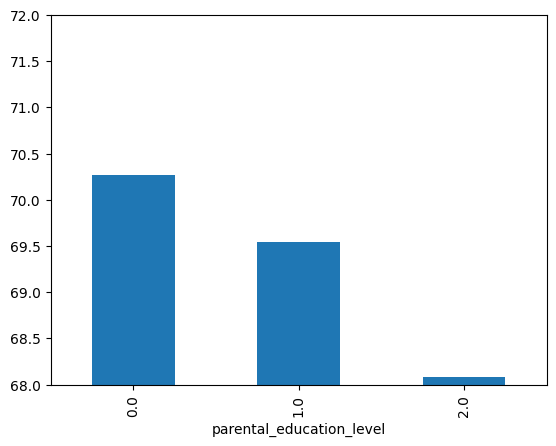

<Axes: xlabel='gender'>

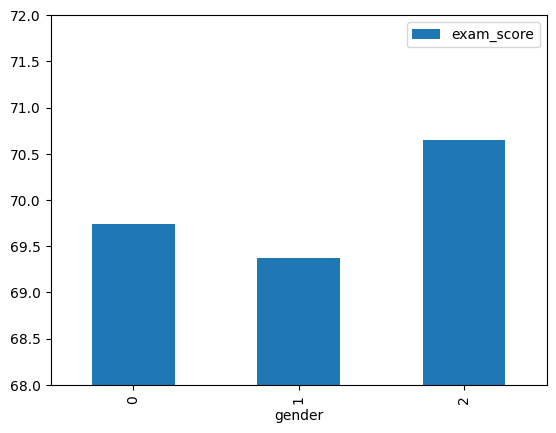